In [340]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pickle

In [341]:
df = pd.read_csv("Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [342]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in the dataframe.

In [343]:
df.shape

(7043, 21)

In [344]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [345]:
feat = list(df.columns)

In [346]:
cat_feat = []
num_feat = []
for feat in feat:
    if df[feat].dtypes == "object":
        cat_feat.append(feat)
    else:
        num_feat.append(feat)

## EDA

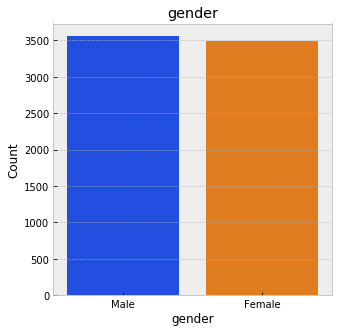

In [347]:
gender = df['gender'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(gender.index, gender.values, palette='bright')
plt.title('gender')
plt.xlabel('gender')
plt.style.use('bmh')
plt.ylabel('Count')
plt.tick_params(labelsize=10)
plt.show()

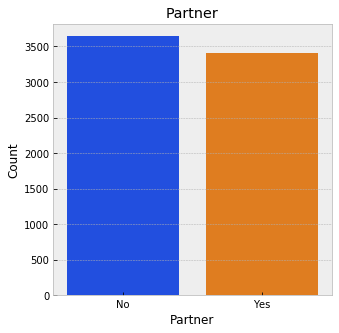

In [348]:
Partner = df['Partner'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(Partner.index, Partner.values, palette='bright')
plt.title('Partner')
plt.xlabel('Partner')
plt.style.use('bmh')
plt.ylabel('Count')
plt.tick_params(labelsize=10)
plt.show()

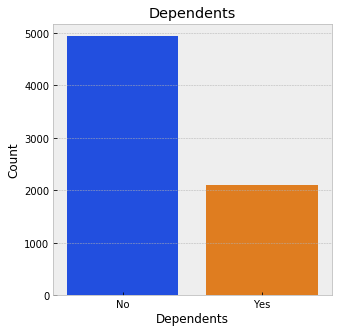

In [349]:
Dependents = df['Dependents'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(Dependents.index, Dependents.values, palette='bright')
plt.title('Dependents')
plt.xlabel('Dependents')
plt.style.use('bmh')
plt.ylabel('Count')
plt.tick_params(labelsize=10)
plt.show()

Only 30% customers have Dependents.

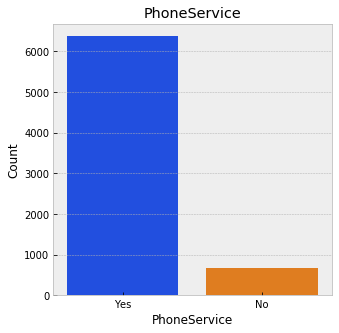

In [350]:
PhoneService = df['PhoneService'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(PhoneService.index, PhoneService.values, palette='bright')
plt.title('PhoneService')
plt.xlabel('PhoneService')
plt.style.use('bmh')
plt.ylabel('Count')
plt.tick_params(labelsize=10)
plt.show()

The number of customers having no phone service is very low.

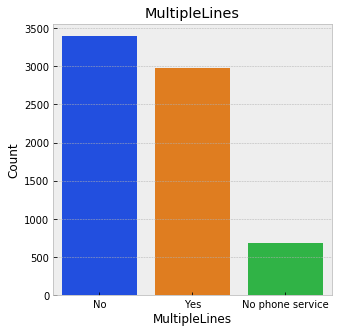

In [351]:

MultipleLines = df['MultipleLines'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(MultipleLines.index, MultipleLines.values, palette='bright')
plt.title('MultipleLines')
plt.xlabel('MultipleLines')
plt.style.use('bmh')
plt.ylabel('Count')
plt.tick_params(labelsize=10)
plt.show()

48 % do not have multiple lines, 42% have multiple lines and 10% have no phone service.

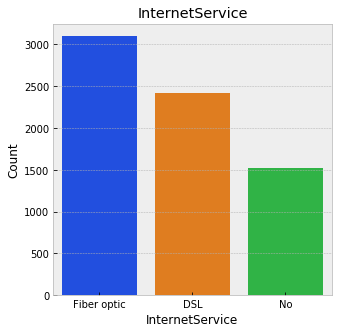

In [352]:
InternetService = df['InternetService'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(InternetService.index, InternetService.values, palette='bright')
plt.title('InternetService')
plt.xlabel('InternetService')
plt.style.use('bmh')
plt.ylabel('Count')
plt.tick_params(labelsize=10)
plt.show()

44% have fiber optic, 34 % have DSL and 22% have no internet service.

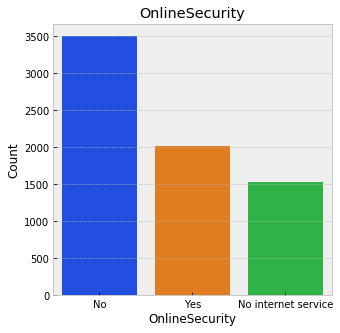

In [353]:
OnlineSecurity = df['OnlineSecurity'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(OnlineSecurity.index, OnlineSecurity.values, palette='bright')
plt.title('OnlineSecurity')
plt.xlabel('OnlineSecurity')
plt.style.use('bmh')
plt.ylabel('Count')
plt.tick_params(labelsize=10)
plt.show()

50% do not have online security, 28% have online security and 22% do not have internet connection.

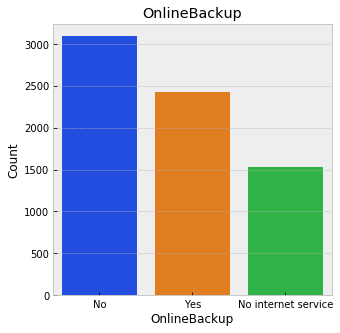

In [354]:
OnlineBackup = df['OnlineBackup'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(OnlineBackup.index, OnlineBackup.values, palette='bright')
plt.title('OnlineBackup')
plt.xlabel('OnlineBackup')
plt.style.use('bmh')
plt.ylabel('Count')
plt.tick_params(labelsize=10)
plt.show()

44% have no online back up, 34 % have have online backup and 22% have no internet service.

In [355]:
2429/7043

0.3448814425670879

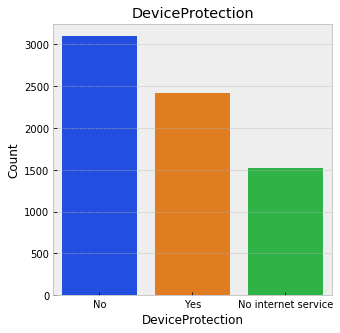

In [356]:
DeviceProtection = df['DeviceProtection'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(DeviceProtection.index, DeviceProtection.values, palette='bright')
plt.title('DeviceProtection')
plt.xlabel('DeviceProtection')
plt.style.use('bmh')
plt.ylabel('Count')
plt.tick_params(labelsize=10)
plt.show()

44% have no device protection, 34 % have have device protection and 22% have no internet service.

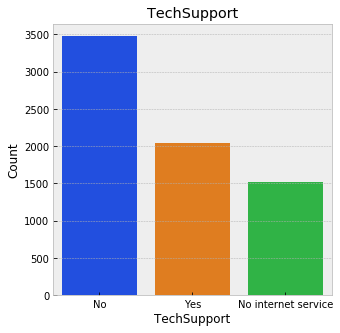

In [357]:
TechSupport = df['TechSupport'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(TechSupport.index, TechSupport.values, palette='bright')
plt.title('TechSupport')
plt.xlabel('TechSupport')
plt.style.use('bmh')
plt.ylabel('Count')
plt.tick_params(labelsize=10)
plt.show()

50% do not have tech support, 28% have tech support and 22% do not have internet connection.

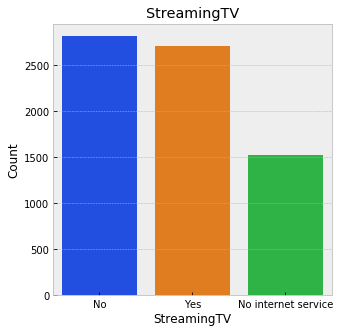

In [358]:
StreamingTV = df['StreamingTV'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(StreamingTV.index, StreamingTV.values, palette='bright')
plt.title('StreamingTV')
plt.xlabel('StreamingTV')
plt.style.use('bmh')
plt.ylabel('Count')
plt.tick_params(labelsize=10)
plt.show()

40% of customer are not streaming TV, 38% are StreamingTV and 22% have no internet connection.

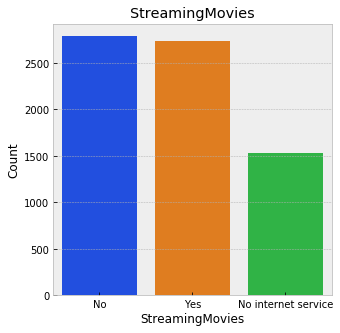

In [359]:
StreamingMovies = df['StreamingMovies'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(StreamingMovies.index, StreamingMovies.values, palette='bright')
plt.title('StreamingMovies')
plt.xlabel('StreamingMovies')
plt.style.use('bmh')
plt.ylabel('Count')
plt.tick_params(labelsize=10)
plt.show()

40% are not streaming movies, 38% are streaming movies and 22% have no internet connection.

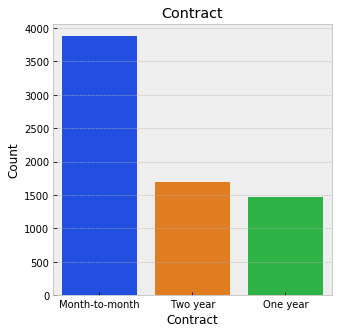

In [360]:
Contract = df['Contract'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(Contract.index, Contract.values, palette='bright')
plt.title('Contract')
plt.xlabel('Contract')
plt.style.use('bmh')
plt.ylabel('Count')
plt.tick_params(labelsize=10)
plt.show()

55% pay monthly, 24% have two year contract and 21% have one year contract.

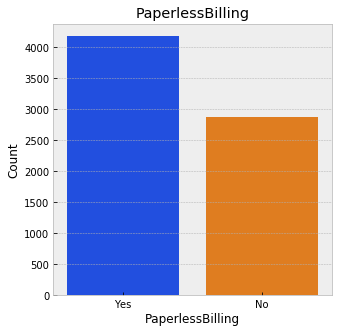

In [361]:
PaperlessBilling = df['PaperlessBilling'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot(PaperlessBilling.index, PaperlessBilling.values, palette='bright')
plt.title('PaperlessBilling')
plt.xlabel('PaperlessBilling')
plt.style.use('bmh')
plt.ylabel('Count')
plt.tick_params(labelsize=10)
plt.show()

More number of customers have paperless billing.

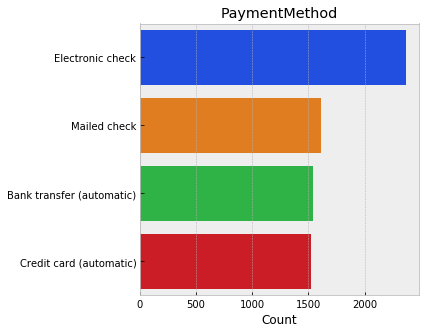

In [362]:
PaymentMethod = df['PaymentMethod'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot( PaymentMethod.values,PaymentMethod.index, palette='bright')
plt.title('PaymentMethod')
plt.xlabel('Count')
plt.style.use('bmh')
plt.tick_params(labelsize=10)
plt.show()

34% pay via electronic check, 23% pay via mailed check, 22% pay via bank transfer and 21 % pay via credit card.

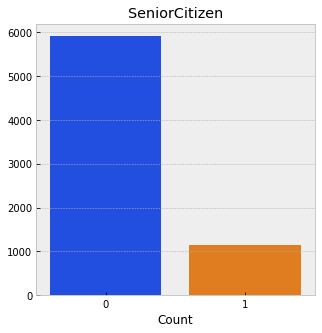

In [363]:
SeniorCitizen = df['SeniorCitizen'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot( SeniorCitizen.index, SeniorCitizen.values, palette='bright')
plt.title('SeniorCitizen')
plt.xlabel('Count')
plt.style.use('bmh')
plt.tick_params(labelsize=10)
plt.show()

84% of customers are not seniorCitizen.

In [364]:
num_feat.append("TotalCharges") # total charges is a numerical feature

In [365]:
num_feat.remove("SeniorCitizen")
num_feat

['tenure', 'MonthlyCharges', 'TotalCharges']

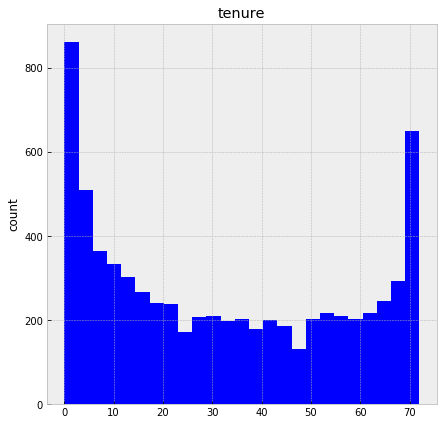

In [366]:
plt.figure(figsize=(7, 7))
df["tenure"].hist(color='b', alpha=1, bins=25)
plt.ylabel('count')
plt.title('tenure')
plt.tick_params(labelsize=10)
plt.show()

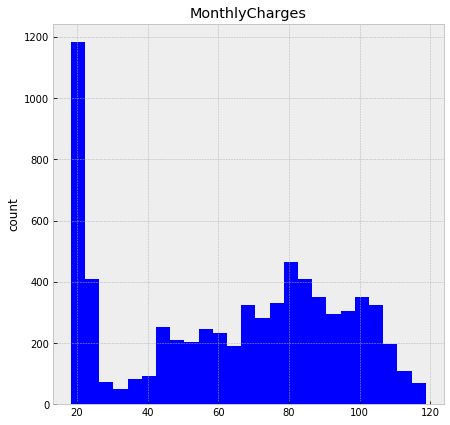

In [367]:
plt.figure(figsize=(7, 7))
df["MonthlyCharges"].hist(color='b', alpha=1, bins=25)
plt.ylabel('count')
plt.title('MonthlyCharges')
plt.tick_params(labelsize=10)
plt.show()

In [368]:
df = (df[df["TotalCharges"]!=" "])
df.shape

(7032, 21)

In [369]:
df = df.drop(["customerID"], axis = 1)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [370]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [371]:
cat_feat = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'Contract','PaperlessBilling','PaymentMethod']

## Label encoding

In [372]:
from sklearn.preprocessing import LabelEncoder

for column in cat_feat:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column]) 

In [205]:
df.head(10)

,Churn,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,PaymentMethod,PhoneService,SeniorCitizen,StreamingMovies,StreamingTV,TechSupport,gender,tenure,totalcharges
0,No,0,0,0,0,29.85,1,2,0,1,1,2,0,0.0,0,0,0,0,1.0,NaN
1,No,1,0,2,0,56.95,0,0,2,0,0,3,1,0.0,0,0,0,1,34.0,NaN
2,Yes,0,0,0,0,53.85,0,2,2,1,0,3,1,0.0,0,0,0,1,2.0,NaN
3,No,1,0,2,0,42.30,1,0,2,0,0,0,0,0.0,0,0,2,1,45.0,NaN
4,Yes,0,0,0,1,70.70,0,0,0,1,0,2,1,0.0,0,0,0,0,2.0,NaN
5,Yes,0,0,2,1,99.65,2,0,0,1,0,2,1,0.0,2,2,0,0,8.0,NaN
6,No,0,1,0,1,89.10,2,2,0,1,0,1,1,0.0,0,2,0,1,22.0,NaN
7,No,0,0,0,0,29.75,1,0,2,0,0,3,0,0.0,0,0,0,0,10.0,NaN
8,Yes,0,0,2,1,104.80,2,0,0,1,1,2,1,0.0,2,2,2,0,28.0,NaN
9,No,1,1,0,0,56.15,0,2,2,0,0,0,1,0.0,0,0,0,1,62.0,NaN


In [373]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556


In [378]:
df = df.replace("Yes", 1)
df = df.replace("No", 0)
X = df.drop(["Churn"], axis = 1)
y = df["Churn"]

## Logistic Regression

In [379]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42, solver = "sag", max_iter = 15000)
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

In [380]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = round(accuracy_score(y_test, y_pred_LR),3)
accuracy

0.794

In [381]:
conf_m = confusion_matrix(y_test, y_pred_LR)
print(conf_m)

[[936 120]
 [170 181]]


## Decision Tree

In [382]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred_DT),3)
accuracy

0.73

In [388]:
conf_m = confusion_matrix(y_test, y_pred_DT)
print(conf_m)

[[862 194]
 [186 165]]


## random forest

In [383]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred_RF),3)
accuracy

0.786

In [389]:
conf_m = confusion_matrix(y_test, y_pred_RF)
print(conf_m)

[[947 109]
 [192 159]]


## KNN

In [384]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred_KNN),3)
accuracy

0.762

In [390]:
conf_m = confusion_matrix(y_test, y_pred_KNN)
print(conf_m)

[[913 143]
 [192 159]]


## fine tuning the best model

In [391]:
import numpy as np
cols = ["Thresholds",'TP', 'FP', 'TN','FN']
lst = []
for i in np.arange(0,1.1,0.1):
    y_pred = np.where(LR.predict_proba(X_test)[:,1]>i,1,0)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    lst.append([round(i,1),tp,fp,tn,fn])
confusion_result_LR = pd.DataFrame(lst, columns=cols)

In [392]:
def calculate_metrics(results):
    roc = pd.DataFrame(index = results['Thresholds'], columns=['recall', 'precision', 'f1', 'tpr', 'fpr'])
    
    for i in results.iterrows():
        
        t, tp, fp,tn, fn = i[1]
        
        recall = tp / (tp + fn)
        
        if tp == fp == 0:
            precision = 0
            true_positive_rate = 0
        
        else:
            precision = tp / (tp + fp)
            true_positive_rate = tp / (tp + fn)
            
        if precision == recall == 0:
            f1 = 0
        else:
            f1 = 2 * (precision * recall) / (precision + recall)
        
        
        false_positive_rate = fp / (fp + tn)
        
        roc.ix[t, 'recall'] = recall
        roc.ix[t, 'precision'] = precision
        roc.ix[t, 'f1'] = f1
        roc.ix[t, 'tpr'] = true_positive_rate
        roc.ix[t, 'fpr'] = false_positive_rate
    
    return roc

In [393]:
roc_LR = calculate_metrics(confusion_result_LR)
roc_LR.reset_index()

C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated

,Thresholds,recall,precision,f1,tpr,fpr
0,0.0,1,0.249467,0.399317,1,1
1,0.1,0.937322,0.338129,0.496979,0.937322,0.609848
2,0.2,0.860399,0.405914,0.551598,0.860399,0.418561
3,0.3,0.774929,0.466552,0.582441,0.774929,0.294508
4,0.4,0.632479,0.533654,0.578879,0.632479,0.183712
5,0.5,0.51567,0.601329,0.555215,0.51567,0.113636
6,0.6,0.333333,0.717791,0.455253,0.333333,0.0435606
7,0.7,0.039886,0.823529,0.076087,0.039886,0.00284091
8,0.8,0,0,0,0,0
9,0.9,0,0,0,0,0


Populating the interactive namespace from numpy and matplotlib


C:\Users\Surjeet\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


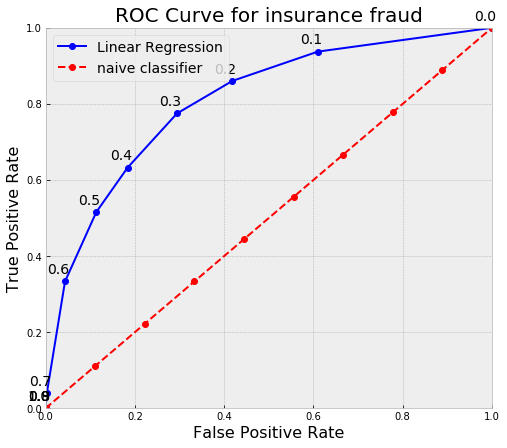

In [394]:
%pylab inline
figsize(8, 7)
plt.style.use('seaborn-dark-palette')
thresholds = [str(t) for t in confusion_result_LR['Thresholds']]
plt.plot(roc_LR['fpr'], roc_LR['tpr'], 'bo-', label = 'Linear Regression');
plt.plot(list(np.linspace(0, 1, num = 10)), list(np.linspace(0, 1, num = 10)), 'ro--', label = 'naive classifier');
for x, y, s in zip(roc_LR['fpr'], roc_LR['tpr'], thresholds):
    plt.text(x - 0.04,y + 0.02, s, fontdict={'size': 14});

plt.legend(prop={'size':14})
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate', size = 16); plt.xlabel('False Positive Rate', size = 16);
plt.title('ROC Curve for insurance fraud', size = 20);

f1 score is maximum at the threshold 0.3.

In [396]:
y_pred = np.where(LR.predict_proba(X_test)[:,1]>0.3,1,0)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("TN:",tn,"FP:",fp,"FN:",fn,"TP:",tp)
recall = round(tp/(tp+fn),2)
print("True positive rate:",recall)
print("False positive rate:",round(fp/(fp+tn),2))
precision = round(tp/(tp+fp),2)
print("Precision:",precision)
print("f-measure:",round(2*recall*precision/(recall+precision),2))

TN: 745 FP: 311 FN: 79 TP: 272
True positive rate: 0.77
False positive rate: 0.29
Precision: 0.47
f-measure: 0.58


In [398]:
# saving the model
import pickle
pickle.dump(LR, open('best_model.pkl','wb'))